<a href="https://colab.research.google.com/github/isabellasims/Google-colabs/blob/master/Julia_data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run shell command once and refresh to change interp to julia

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2020-12-05 00:44:46 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Artifacts ─────── v1.3.0
  Installed VersionParsing ── v1.2.0
  Installed MbedTLS_jll ───── v2.16.8+1
  Installed ZeroMQ_jll ────── v4.3.2+5
  Installed SoftGlobalScope ─ v1.1.0
  Installed Parsers ───────── v1.0.13
  Installed IJulia ────────── v1.23.1
  Installed JLLWrappers ───── v1.1.3
  Installed Conda ─────────── v1.5.0
  Installed ZMQ ───────────── v1.2.1
  Installed JSON ──────────── v0.21.1
  Installed MbedTLS ───────── v1.0.3
######################################################################## 100.

Add Packages:


** side note: when using a normal IDE, you can add packages in one file and then "activate them" in another file using Pkg.activate() to avoid re-importing packages (saves a decent amount of time)

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("HTTP")
Pkg.add("CSVFiles")
Pkg.add("CSV")
Pkg.add("Formatting")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed LibVPX_jll ────────────────── v1.9.0+1
  Installed FFMPEG_jll ────────────────── v4.3.1+4
  Installed FreeType2_jll ─────────────── v2.10.1+5
  Installed TableTraits ───────────────── v1.0.0
  Installed DataAPI ───────────────────── v1.4.0
  Installed StructArrays ──────────────── v0.4.4
  Installed HTTP ──────────────────────── v0.8.19
  Installed Plots ─────────────────────── v1.6.12
  Installed Adapt ─────────────────────── v2.3.0
  Installed FFMPEG ────────────────────── v0.4.0
  Installed DataStructures ────────────── v0.18.8
  Installed StatsBase ─────────────────── v0.33.2
  Installed Grisu ─────────────────────── v1.0.0
  Installed Contour ───────────────────── v0.5.7
  Installed IterTools ─────────────────── v1.3.0
  Installed x264_jll ──────────────────── v2020.7.14+2
  Installed IniFile ───────────────────── v0.5.0
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed OpenSSL_jll ───────────────── v1.1.1+6
  Installed Opus_j

Example of a simple plot

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


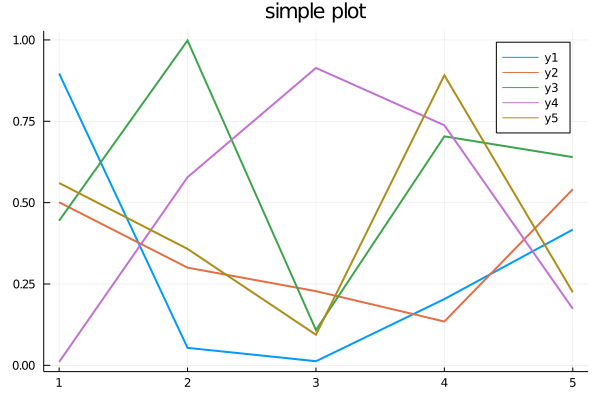

In [ ]:
using Plots
plot(rand(5,5),linewidth = 2,title="simple plot")

**VISUALIZING COVID-19 DATA **

In [ ]:
using DataFrames,CSV,CSVFiles
# download the data
d = download("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv","us-states.csv" ) # download CSV param 1 = repo/url, param 2 = file path
f = CSV.File(d)

# load as a DF
df = DataFrame(load(d))

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1260
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260
┌ Info: Precompiling CSVFiles [5d742f6a-9f54-50ce-8119-2520741973ca]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** increm

,date,state,fips,cases,deaths
,Date…,String,Int64,Int64,Int64
1,2020-01-21,Washington,53,1,0
2,2020-01-22,Washington,53,1,0
3,2020-01-23,Washington,53,1,0
4,2020-01-24,Illinois,17,1,0
5,2020-01-24,Washington,53,1,0
6,2020-01-25,California,6,1,0
7,2020-01-25,Illinois,17,1,0
8,2020-01-25,Washington,53,1,0
9,2020-01-26,Arizona,4,1,0


In [ ]:
# accessing columns in of a df
states = df.state
dates = df.date

15194-element Array{Dates.Date,1}:
 2020-01-21
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-24
 2020-01-25
 2020-01-25
 2020-01-25
 2020-01-26
 2020-01-26
 2020-01-26
 2020-01-26
 2020-01-27
 ⋮
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03
 2020-12-03

In [ ]:
# get the size of the data set
tup = size(df.date) # SIZE OF CSV/ ARRAY
num_rows = tup[1]

15194

In [ ]:
jan = 0; feb = 0; march = 0; april = 0; may = 0; june = 0; july = 0;august = 0; september = 0; october = 0; november = 0; december = 0;
months = []
for i = 1:num_rows
           date = df.date[i]
           push!(dates,date)
           # get the months of each point
           a = string(dates[i])
           cases = df.deaths[i]
           
          if a[6:7] == "01"
            global jan = jan + cases
          elseif a[6:7] == "02"
            global feb = feb + cases
        elseif a[6:7] == "03"
            global march = march + cases
          elseif a[6:7] == "04"
            global april = april + cases
          elseif a[6:7] == "05"
            global may = may + cases
          elseif a[6:7] == "06"
            global june = june + cases
          elseif a[6:7] == "07"
            global july = july + cases
          elseif a[6:7] == "08"
            global august = august + cases
          elseif a[6:7] == "09"
            global september = september + cases
          elseif a[6:7] == "10"
            global october = october + cases
          elseif a[6:7] == "11"
            global november = november + cases
          elseif a[6:7] == "12"
            global december = december + cases

           end
end
push!(months,jan)
push!(months,feb)
push!(months,march)
push!(months,april)
push!(months,may)
push!(months,june)
push!(months,july)
push!(months,august)
push!(months,september)
push!(months,october)
push!(months,november)
push!(months,december)
print(months)

Any[0, 1, 20322, 990495, 2695260, 3498954, 4307836, 5259819, 5879775, 6774193, 7449444, 820526]

Plotting the Data 

* just to note, december is obviously comparatively low as of righting this because it hasn't happened yet

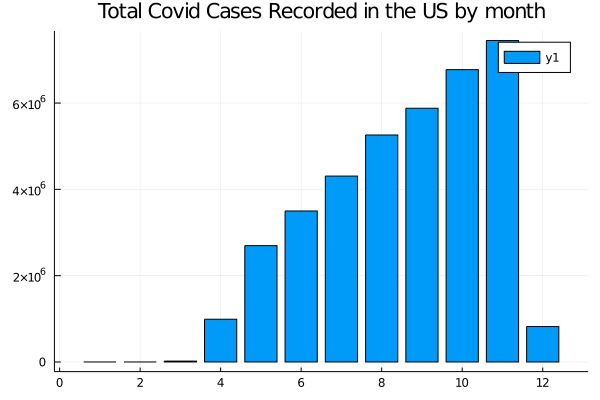

In [ ]:
using Plots
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = months


# add format package 
bar(x,y, title="Total Covid Cases Recorded in the US by Month")

Cleaning up the Plot

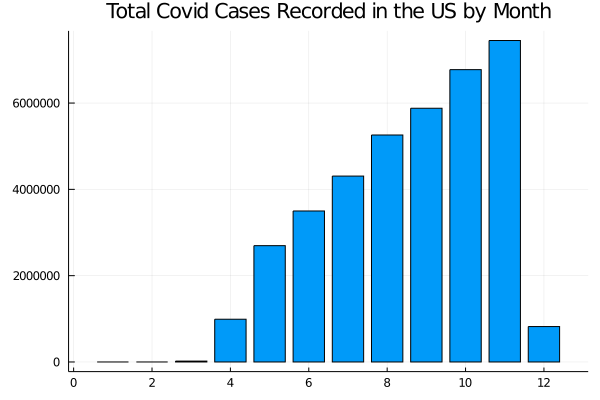

In [ ]:
# Julia defaults to plotting in scientific noation, formatter package can change plot to normal
using Formatting
bar(x,y, title="Total Covid Cases Recorded in the US by Month",formatter = format,legend = false)

Trying out different plots

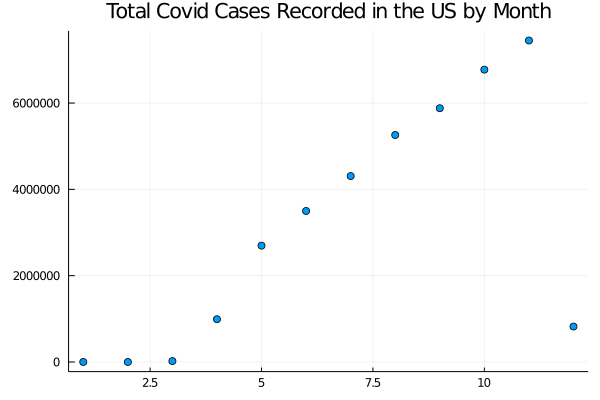

In [ ]:
scatter(x,y, title="Total Covid Cases Recorded in the US by Month",formatter = format,legend = false)

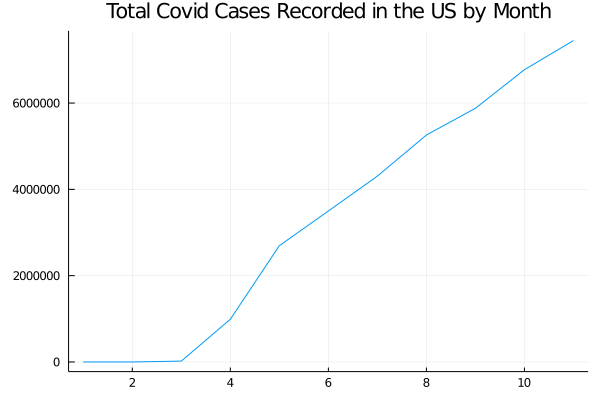

In [ ]:
plot(x[1:11],y[1:11], title="Total Covid Cases Recorded in the US by Month",formatter = format,legend = false)